In [2]:
import pandas as pd
import copy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
from pandas import DataFrame, Series
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

%matplotlib inline

path = ''

In [3]:

frames = [df1, df2, df3]

result = pd.concat(frames)

unstacked = pd.DataFrame(f.unstack()).reset_index()
unstacked.columns = ['feature', 'feature_index', 'feature_value']
#merge them together to get the label value for each feature value
plot_data = pd.merge(unstacked, labels, left_on = 'feature_index', right_index = True)
#wrap a seaborn facetgrid
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(plot_data, col="feature")
g = (g.map(plt.scatter, "feature_value", "label", **kws))


NameError: name 'df1' is not defined

In [5]:
filename='test'
path="./6 loci DMI/"
exp="1l_9900df_2s"
df=pd.read_csv(path+"genoTime_"+exp+".csv")
lag = pd.read_csv(path+exp+"_lag.csv")
lag = lag[lag["Unnamed: 0"] != "Total"]
df['cgen']=df['cgen']-10000
df

,Unnamed: 0,rep,cgen,freq
0,0,1.0,0.0,NaN
1,1,1.0,10.0,0.000000
2,2,1.0,20.0,0.000000
3,3,1.0,30.0,0.000000
4,4,1.0,40.0,0.000000
...,...,...,...,...
5095,5095,100.0,460.0,0.022716
5096,5096,100.0,470.0,0.013463
5097,5097,100.0,480.0,0.019250
5098,5098,100.0,490.0,0.030131


In [6]:
lag

,Unnamed: 0,rep,lag phase duration
0,0,1,12
1,1,2,500
2,2,3,12
3,3,4,11
4,4,5,500
...,...,...,...
95,95,96,500
96,96,97,11
97,97,98,11
98,98,99,500


In [7]:
lag["fail"]=(lag["lag phase duration"] >= 500)
diction=lag.set_index('rep')['fail'].to_dict()
df['fail']=True
df['rep']=df['rep'].astype(int)
df["fail"] = df["rep"].map(lambda x:diction[x])

lagdict=dict(zip(lag.rep, lag['lag phase duration']))
df['lag']=df['rep'].map(lagdict)
df

,Unnamed: 0,rep,cgen,freq,fail,lag
0,0,1,0.0,NaN,False,12
1,1,1,10.0,0.000000,False,12
2,2,1,20.0,0.000000,False,12
3,3,1,30.0,0.000000,False,12
4,4,1,40.0,0.000000,False,12
...,...,...,...,...,...,...
5095,5095,100,460.0,0.022716,False,307
5096,5096,100,470.0,0.013463,False,307
5097,5097,100,480.0,0.019250,False,307
5098,5098,100,490.0,0.030131,False,307


In [8]:
#filter df to only have generation 10 of each rep
lagplus=lag
startdf= df[df["cgen"] == 10]
enddf= df[df["cgen"] == 500]
#starting genotype freq
lagplus=pd.merge(lagplus,startdf[['rep','freq']],on='rep', how='left')
lagplus.rename(columns={"freq": "startg"}, inplace=True)

#end genotype freq
lagplus=pd.merge(lagplus,enddf[['rep','freq']],on='rep', how='left')
lagplus.rename(columns={"freq": "endg"}, inplace=True)


#purging?
lagplus['purging'] = np.where((lagplus['startg'] > .3)&(lagplus['endg'] < .1), True, False)

lagplus

,Unnamed: 0,rep,lag phase duration,fail,startg,endg,purging
0,0,1,12,False,0.000000,0.000000,False
1,1,2,500,True,0.410156,0.479310,False
2,2,3,12,False,0.000000,0.000000,False
3,3,4,11,False,0.000000,0.000000,False
4,4,5,500,True,0.508065,0.449393,False
...,...,...,...,...,...,...,...
95,95,96,500,True,0.524000,0.434389,False
96,96,97,11,False,0.000000,0.000000,False
97,97,98,11,False,0.000000,0.000000,False
98,98,99,500,True,0.465649,0.490625,False


In [9]:
df['purging']=False
df["purging"] = df["rep"].map(lambda x:diction[x])

df

,Unnamed: 0,rep,cgen,freq,fail,lag,purging
0,0,1,0.0,NaN,False,12,False
1,1,1,10.0,0.000000,False,12,False
2,2,1,20.0,0.000000,False,12,False
3,3,1,30.0,0.000000,False,12,False
4,4,1,40.0,0.000000,False,12,False
...,...,...,...,...,...,...,...
5095,5095,100,460.0,0.022716,False,307,False
5096,5096,100,470.0,0.013463,False,307,False
5097,5097,100,480.0,0.019250,False,307,False
5098,5098,100,490.0,0.030131,False,307,False


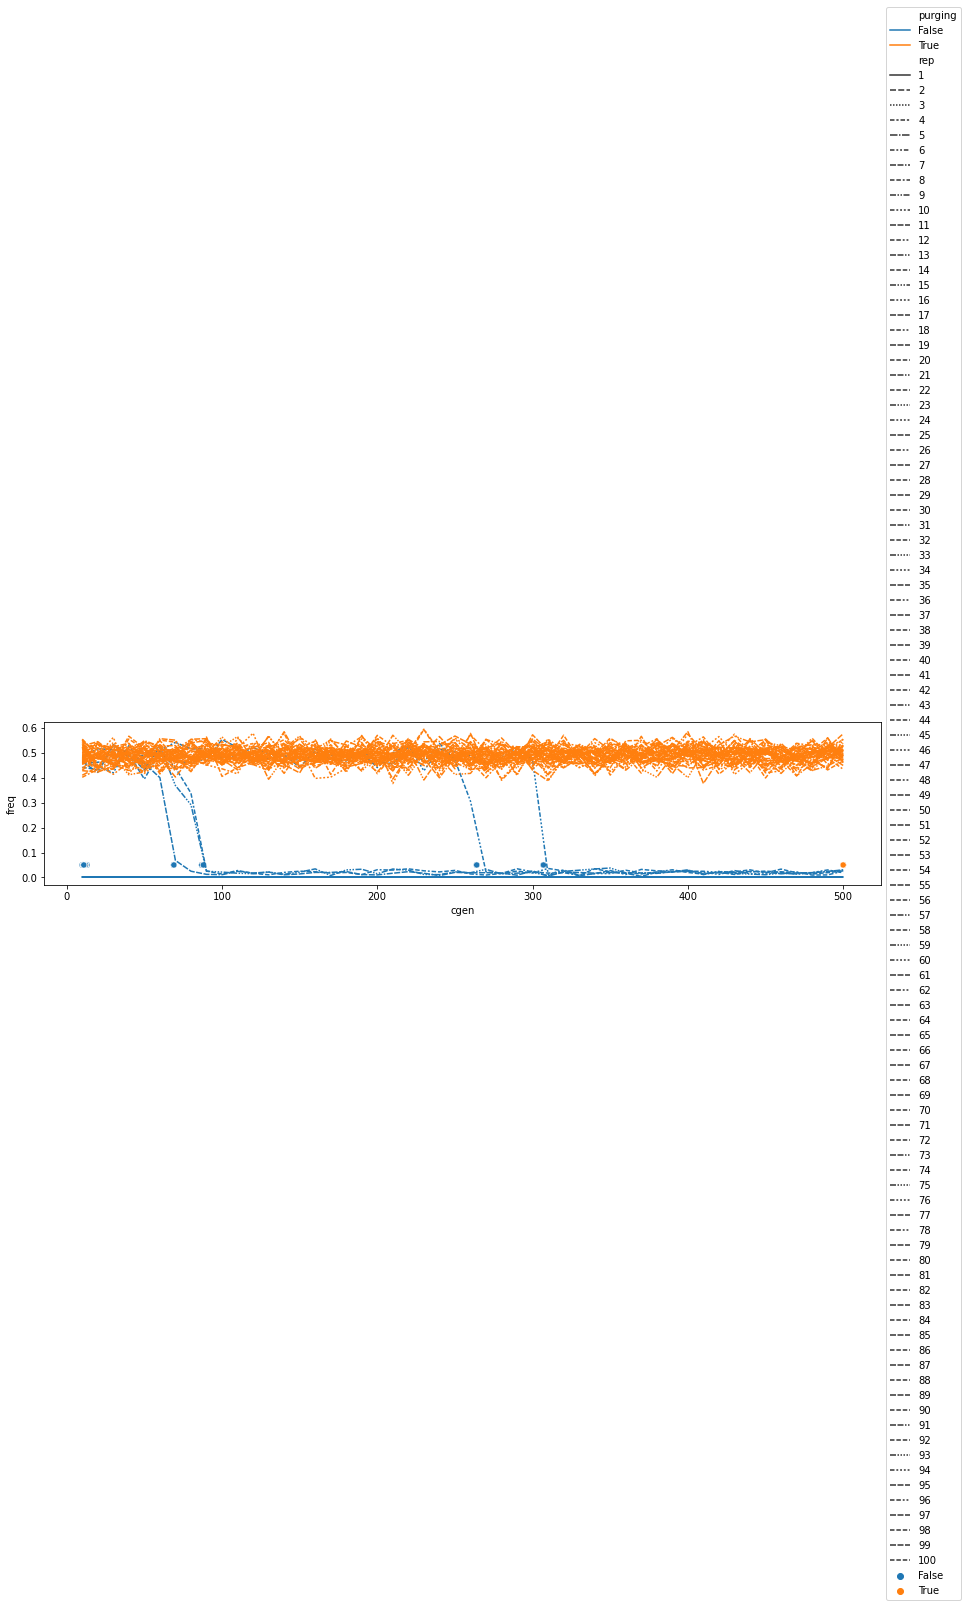

In [10]:
fig, ax = plt.subplots(figsize=(15,3))

sns.lineplot(
    data=df ,
    x="cgen", y="freq",
    #size='rep',z
    hue="purging",
    style="rep",
    ax=ax
)
sns.scatterplot(data=df, hue='purging', x="lag", y=.05, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

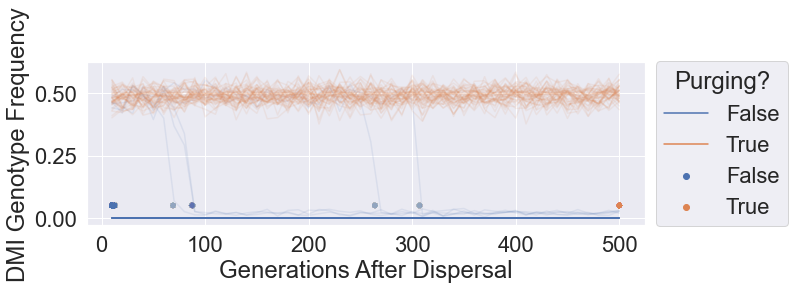

In [13]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(10,3))

sns.lineplot(
    data=df ,
    x="cgen", y="freq",
    hue="purging",
    units='rep',
    alpha=.1,
    estimator=None,
    ax=ax
)
sns.scatterplot(data=df, hue='purging', x="lag", alpha=.01, y=.05, ax=ax)
ax.set_xlabel('Generations After Dispersal')
ax.set_ylabel('DMI Genotype Frequency') 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Purging?")

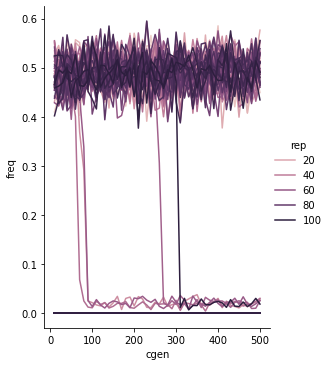

In [44]:
#sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
plot=sns.relplot(
    data=df,
    x="cgen", y="freq",
    #size='rep',z
    hue="rep",
    kind="line", 
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)


In [45]:
#df[df.fail==True]

In [46]:
low=18
high=300
filtdf=df[(df['lag'] >low)& (df['lag'] <high)]
filtlag=lag[(lag['lag phase duration'] >low)& (lag['lag phase duration'] <high)]

filtdf

,Unnamed: 0,rep,cgen,freq,fail,lag,purging
1530,1530,31,0.0,NaN,False,87,False
1531,1531,31,10.0,0.464286,False,87,False
1532,1532,31,20.0,0.421456,False,87,False
1533,1533,31,30.0,0.528169,False,87,False
1534,1534,31,40.0,0.494413,False,87,False
...,...,...,...,...,...,...,...
2953,2953,58,460.0,0.033400,False,88,False
2954,2954,58,470.0,0.018537,False,88,False
2955,2955,58,480.0,0.013872,False,88,False
2956,2956,58,490.0,0.019123,False,88,False


In [47]:
filtdf[filtdf.rep==46]

,Unnamed: 0,rep,cgen,freq,fail,lag,purging


In [48]:
##need to get rid of totals
lag[lag.rep==46]

,Unnamed: 0,rep,lag phase duration,fail
45,45,46,500,True


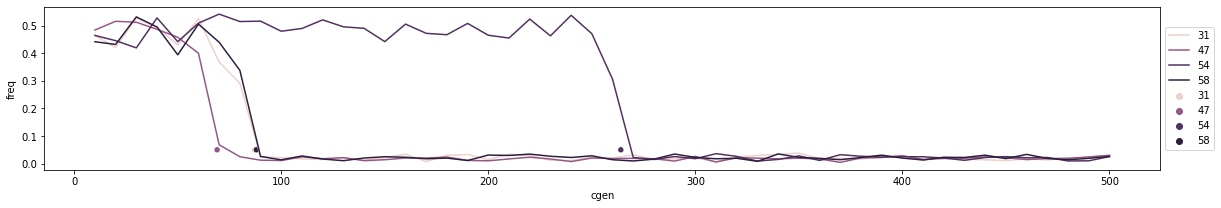

In [49]:
fig, ax = plt.subplots(figsize=(20,3))

sns.lineplot(
    data=filtdf ,
    x="cgen", y="freq",
    #size='rep',z
    hue="rep", 
    ax=ax
)
sns.scatterplot(data=filtlag, hue='rep', x="lag phase duration", y=.05, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.axvline(lag, color='rep', linestyle='--')

In [14]:
plt.savefig('genoTime_'+filename+'.png')

<Figure size 432x288 with 0 Axes>

In [15]:
#get rid of color since no failure, then 
    #1) make plot a lot longer horizontallly (to blow up where lag phase ends)
    #2) make x axis range from 0-500 (colonization phase, aka dispersal starts)
    #3) overlay lag phase on top of the plot (vertical bars for when lag phase ends. show that lag phase ends right when DMI is purged)
    
    #colonization success is due to purging of DMIs